# Boston
> Regression

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

import sys
from os.path import abspath

try:
    from GAparsimony import GAparsimony, Population, getFitness
    from GAparsimony.util import linearModels
except:
    sys.path.append(abspath("C:/Users/Millan/Desktop/GAparsimony"))
    from GAparsimony import GAparsimony, Population, getFitness
    from GAparsimony.util import linearModels

In [2]:
boston = load_boston()
X, y = boston.data, boston.target 
X = StandardScaler().fit_transform(X)

In [3]:
rerank_error = 0.01

params = {"alpha":{"range": (1., 25.9), "type": Population.FLOAT}, 
            "tol":{"range": (0.0001,0.9999), "type": Population.FLOAT}}

In [4]:
fitness = getFitness(Lasso, mean_squared_error, linearModels, regression=True, test_size=0.2, random_state=42, n_jobs=-1)

In [10]:
GAparsimony_model = GAparsimony(fitness=fitness,
                                params = params, 
                                features = boston.feature_names,
                                keep_history = True,
                                rerank_error = rerank_error,
                                popSize = 40,
                                maxiter = 50, early_stop=10,
                                feat_thres=0.90, # Perc selected features in first generation
                                feat_mut_thres=0.10, # Prob of a feature to be one in mutation
                                seed_ini = 1234)

In [11]:
GAparsimony_model.fit(X, y)

GA-PARSIMONY | iter = 0
 MeanVal = -79.1813338 | ValBest = -30.3470614 | TstBest = -29.2466835 |ComplexBest = 13000000021.927263| Time(min) = 0.0785643  

GA-PARSIMONY | iter = 1
 MeanVal = -55.0713465 | ValBest = -30.2283235 | TstBest = -29.2267507 |ComplexBest = 12000000022.088743| Time(min) = 0.0735482  

GA-PARSIMONY | iter = 2
 MeanVal = -34.8473723 | ValBest = -30.2283235 | TstBest = -29.2267507 |ComplexBest = 12000000022.088743| Time(min) = 0.0646696  

GA-PARSIMONY | iter = 3
 MeanVal = -38.5251529 | ValBest = -30.0455259 | TstBest = -29.2712578 |ComplexBest = 10000000022.752678| Time(min) = 0.0599154  

GA-PARSIMONY | iter = 4
 MeanVal = -38.1097172 | ValBest = -29.8640867 | TstBest = -29.1833224 |ComplexBest = 8000000022.721948| Time(min) = 0.0698357  

GA-PARSIMONY | iter = 5
 MeanVal = -36.9861672 | ValBest = -29.8519095 | TstBest = -28.9502479 |ComplexBest = 7000000022.153884| Time(min) = 0.0648193  

GA-PARSIMONY | iter = 6
 MeanVal = -33.3354946 | ValBest = -29.8588842 |

In [12]:
GAparsimony_model.summary()

+------------------------------------+
|             GA-PARSIMONY           |
+------------------------------------+

GA-PARSIMONY settings:
 Number of Parameters      = 2
 Number of Features        = 13
 Population size           = 40
 Maximum of generations    = 50
 Number of early-stop gen. = 10
 Elitism                   = 8
 Crossover probability     = 0.8
 Mutation probability      = 0.1
 Max diff(error) to ReRank = 0.01
 Perc. of 1s in first popu.= 0.9
 Prob. to be 1 in mutation = 0.1

 Search domain = 
           alpha     tol  CRIM   ZN  INDUS  CHAS  NOX   RM  AGE  DIS  RAD  \
Min_param    1.0  0.0001   0.0  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Max_param   25.9  0.9999   1.0  1.0    1.0   1.0  1.0  1.0  1.0  1.0  1.0   

           TAX  PTRATIO    B  LSTAT  
Min_param  0.0      0.0  0.0    0.0  
Max_param  1.0      1.0  1.0    1.0  


GA-PARSIMONY results:
 Iterations                = 25
 Best validation score = -29.502012171608403


Solution with the best validation s

In [13]:
GAparsimony_model.importance()

+--------------------------------------------+
|                  GA-PARSIMONY              |
+--------------------------------------------+

Percentage of appearance of each feature in elitists: 

  PTRATIO LSTAT   RM    B      AGE     NOX  CRIM      DIS    INDUS     CHAS  \
0     100   100  100  100  76.5625  40.625  37.5  31.7708  23.4375  17.7083   

        ZN      TAX      RAD  
0  14.0625  11.9792  10.9375  


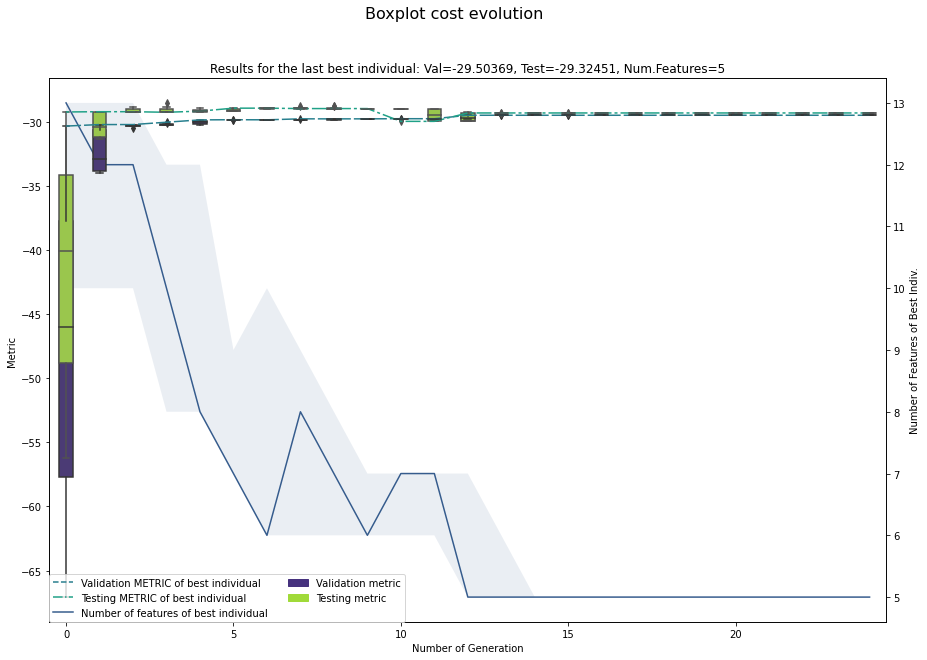

In [14]:
GAparsimony_model.plot(size_plot=(15,10))